In [1]:
import os 
import sys 

import pandas as pd 
import numpy as np 
import matplotlib as plt 
%matplotlib inline 

import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import train_test_split 

In [2]:
# Constants 
resume_data = "..\\samples\\UpdatedResumeDataSet.csv"

In [3]:
res_data = pd.read_csv("..\\samples\\UpdatedResumeDataSet.csv")
res_data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
print(f"Number of unique jobs: {len(res_data['Category'].unique())}")

Number of unique jobs: 25


In [5]:
print (res_data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Mechanical Engineer          40
Data Science                 40
Operations Manager           40
Blockchain                   40
Sales                        40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
res_data['cleaned_resume'] = res_data.Resume.apply(lambda x: cleanResume(x))

In [7]:
res_data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


# Lemmatizing the text

In [8]:
import nltk
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


# Returning the lemmatize words

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as stp


lemmatizer = WordNetLemmatizer()
analyzer = TfidfVectorizer().build_analyzer()
def stemmed_words(doc):
    return (lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in analyzer(doc) if w not in set(stp.words('english')))


# Vectorizing the words using a custom tf_idf vectorizer function

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as stp

def tf_vectorizer(doc):
    tf_idf_vect = TfidfVectorizer(analyzer = stemmed_words, max_features=1500)
    corpus_vector = tf_idf_vect.fit_transform(doc).todense()
    
    return corpus_vector

# Label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
resumeDataSet = res_data.copy()
resumeDataSet['Category'] = le.fit_transform(resumeDataSet['Category'])

# Vectorize and split the data into labels and vectorized dat

In [34]:
from sklearn.model_selection import train_test_split

resume_corpus = resumeDataSet['cleaned_resume'].values
resume_label = resumeDataSet['Category'].values

tf_idf_vect = TfidfVectorizer(analyzer = stemmed_words, max_features=500)

vectorized_res = tf_idf_vect.fit_transform(resume_corpus)

# Split the data

In [41]:

X_train,X_temp,y_train,y_temp = train_test_split(vectorized_res,resume_label,random_state=0, test_size = 0.4)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, random_state=0, test_size = 0.5)

print(X_train.shape)
print(X_test.shape)

(577, 500)
(192, 500)


In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [37]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_valid, y_valid)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00        12
           4       1.00      0.62      0.77         8
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         7
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.

C:\Users\vivek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC())
model.fit(X_train, y_train)
prediction = model.predict(X_valid)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_valid, y_valid)))

print("\n Classification report for classifier %s:\n%s\n" % (model, metrics.classification_report(y_valid, prediction)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=SVC()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         5
           8       1.00      0.82      0.90        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
    

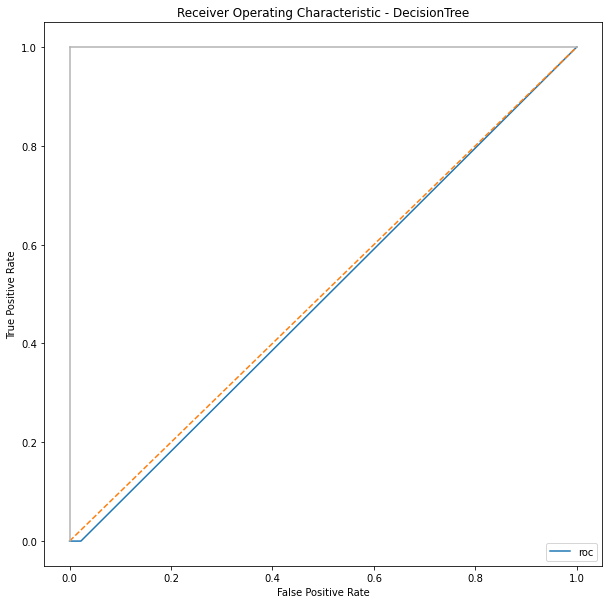

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

predict = clf.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predict, pos_label=24)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, label = "roc")
plt.plot([0, 1], ls="--")
plt.legend(loc="lower right")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

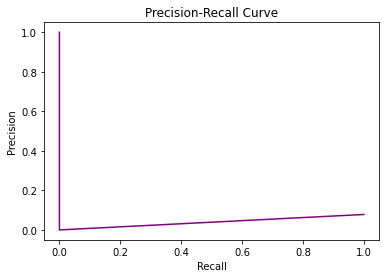

In [17]:
from sklearn.metrics import precision_recall_curve

predict = clf.predict_proba(X_test)[:,1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predict, pos_label = 22)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Using XGboost and GridSearchCV for Parameters

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   26.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  7.5min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 15.3min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 18.8min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

# Trying to add more data to tackle the overfitting of the model

In [19]:
import textract
import re

def get_content_as_string(filename):
    text = textract.process(filename)
    lower_case_string =  str(text.decode('utf-8')).lower()
    #final_string = re.sub('[^a-zA-Z0-9 \n]', '', lower_case_string)
    return lower_case_string

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

job_types = ['java', 'sre', 'data_science_analyst', 'devops']

df_dict = {}
df_dict['Category'] = []
df_dict['resume'] = []

resume_file_path = "C:\\Users\\vivek\\Desktop\\resume_ranking\\samples\\resumes_sample"
jd_file_path = "C:\\Users\\vivek\\Desktop\\resume_ranking\\samples\\job_descriptions"


for resume_type in job_types:
    
    resume_directory = os.path.join(resume_file_path, resume_type)
    resume = ""
    
    for file in os.listdir(resume_directory):
        resume = resume_directory + "\\" + file 
        text = get_content_as_string(resume)
        df_dict['Category'].append(resume_type)
        df_dict['resume'].append(text)
    
igd_df = pd.DataFrame(df_dict)

In [21]:
igd_df['cleaned_resume'] = igd_df.resume.apply(lambda x: cleanResume(x))

In [22]:
igd_df.rename(columns = {'resume':'Resume'}, inplace = True)

In [23]:
combined_res_data = pd.concat([res_data, igd_df], ignore_index = True)
combined_res_data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
1100,devops,professional summary\r\n•\r\n\r\noverall: 9.5 ...,professional summary overall 9 5 years of it e...
1101,devops,devops engineer\r\n\r\nobjective\r\n\r\nobject...,devops engineer objective objective looking fo...
1102,devops,aws devops engineer\r\ncareer objectives\r\nto...,aws devops engineer career objectives to work ...
1103,devops,sre/ devops dummy\r\nprofessional summary:\r\n...,sre devops dummy professional summary over all...


## Now that we have 117 more resumes in the data, we'll try to retrace our steps

In [24]:
combined_res_data['Category'].value_counts()

java                         89
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Blockchain                   40
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
data_science_analyst         23
Advocate                     20
devops                       18
sre                          13
Name: Category, dtype: int64

In [25]:
len(combined_res_data['Category'].unique())

29

In [26]:
combined_res_data = combined_res_data.replace(['data_science_analyst'], 'Data Science')

In [27]:
combined_res_data['Category'].value_counts()

java                         89
Java Developer               84
Testing                      70
Data Science                 63
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Blockchain                   40
Sales                        40
Mechanical Engineer          40
ETL Developer                40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
devops                       18
sre                          13
Name: Category, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combined_res_data['Category'] = le.fit_transform(combined_res_data['Category'])

In [29]:
from sklearn.model_selection import train_test_split

combined_resume_corpus = combined_res_data['cleaned_resume'].values
combined_resume_label = combined_res_data['Category'].values

tf_idf_vect = TfidfVectorizer(analyzer = stemmed_words, max_features=200)

vectorized_res = tf_idf_vect.fit_transform(combined_resume_corpus)

In [30]:

X_train,X_temp,y_train,y_temp = train_test_split(vectorized_res,combined_resume_label,random_state=0, test_size = 0.4)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, random_state=0, test_size = 0.5)

print(X_train.shape)
print(X_test.shape)

(663, 200)
(221, 200)


In [31]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_valid)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_valid, y_valid)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_valid, prediction)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Accuracy of KNeighbors Classifier on training set: 0.94
Accuracy of KNeighbors Classifier on test set: 0.91

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.40      1.00      0.57         2
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         7
           4       0.80      0.80      0.80         5
           5       1.00      1.00      1.00         4
           6       0.87      0.93      0.90        14
           7       0.86      0.86      0.86         7
           8       1.00      0.83      0.91        12
           9       0.80      0.67      0.73         6
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         8
          12       1.00      0.58      0.74        12
          13       1.00      1.00      1.

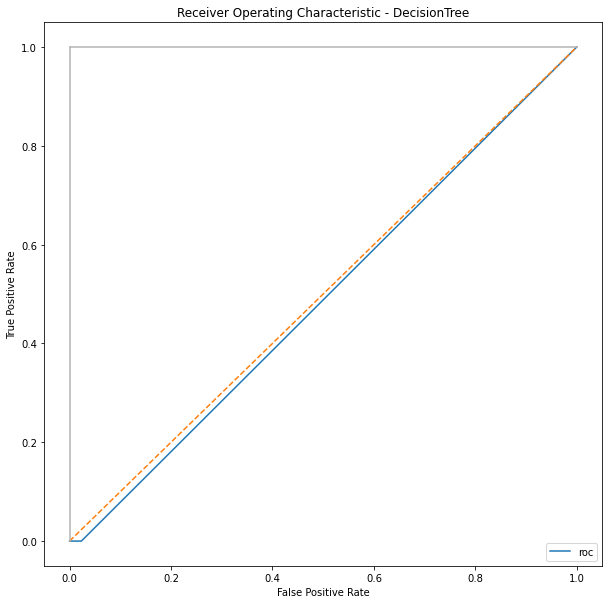

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

predict = clf.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predict, pos_label=2)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, label = "roc")
plt.plot([0, 1], ls="--")
plt.legend(loc="lower right")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

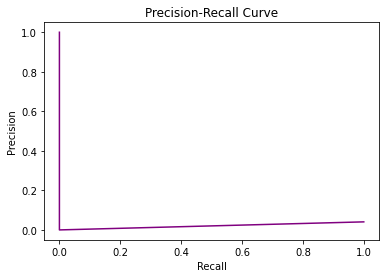

In [33]:
from sklearn.metrics import precision_recall_curve

predict = clf.predict_proba(X_test)[:,1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predict, pos_label = 22)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [40]:
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC())
model.fit(X_train, y_train)
prediction = model.predict(X_valid)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_valid, y_valid)))

print("\n Classification report for classifier %s:\n%s\n" % (model, metrics.classification_report(y_valid, prediction)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=SVC()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         5
           8       1.00      0.82      0.90        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
    